In [1]:
import numpy as np 
import pandas as pd 
import sys, os

In [3]:
sys.path.append('../src')
from interaction import Interaction

In [4]:
# slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+CD8/KIR+CD8_filtered85/KIR+CD8_filtered85_noint_output/0.1_1_out'
slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+TEDDY/KIR+TEDDY_filtered85/KIR+TEDDY_filtered85_noint_output/0.01_0.5_out'
machop = Interaction(slide_outs, plm_dim=16)

In [10]:
beta_interaction = machop.compute(fdr=0.20)
beta_interaction.shape

/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/knockpy/mrc.py:276: UserWarning: 
	---------------------------------------------------------
	---------------------------------------------------------
	The choldate package is not installed:
	solving for MVR or maxent knockoffs without it will be 
	~5x slower. For instructions on how to install choldate,
	see https://amspector100.github.io/knockpy/installation.html.
	To disable this warning, set choldate_warning=False as an 
	argument or a knockoff_kwarg.
	----------------------------------------------------------
	----------------------------------------------------------

  warnings.warn(constants.CHOLDATE_WARNING)


(5, 16)

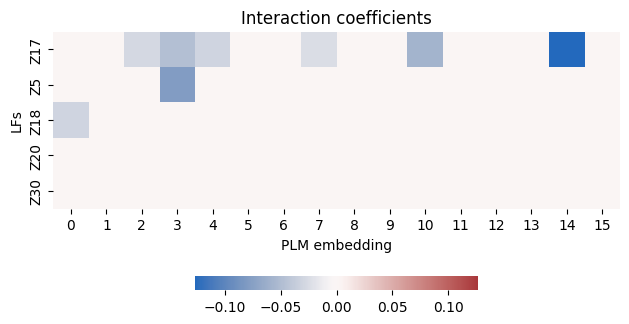

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

beta_interaction = machop.sig_interaction
max = np.max(np.abs(beta_interaction))

fig, ax = plt.subplots()
df = pd.DataFrame(beta_interaction, index=machop.sig_LFs, columns=range(machop.l))
sns.heatmap(data=df, square=True, ax=ax, vmin=-max, vmax=max, 
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(ylabel='LFs', xlabel='PLM embedding', title='Interaction coefficients')

plt.tight_layout()


In [7]:
from deletion import EmbeddingEvaluator

evaluator = EmbeddingEvaluator()
accuracies = evaluator.get_contributions(
    embedding=machop.plm_embedding, 
    y=machop.y
)

/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/ix/djis

In [8]:
accuracies 

[0.8841134334216465,
 0.8676282994799333,
 0.8783240113825925,
 0.8781277597880482,
 0.87400647630262,
 0.8651751545481307,
 0.8779315081935041,
 0.8677264252772053,
 0.87214208615445,
 0.8770483760180552,
 0.8733195957217152,
 0.8832303012461976,
 0.8729270925326268,
 0.8731233441271711,
 0.8765577470316946,
 0.8701795702090079,
 0.8773427534098714]

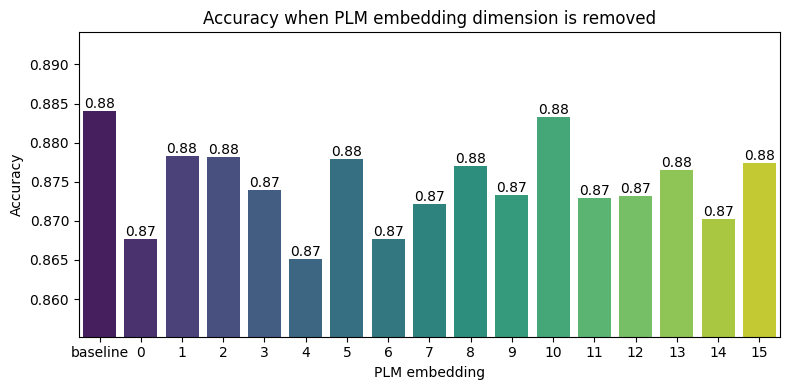

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))

labels = ['baseline'] + list(range(machop.l))
sns.barplot(y=accuracies, x=labels, ax=ax, hue=labels, palette='viridis', legend=False)
ax.set_ylabel('Accuracy')
ax.set_xlabel('PLM embedding')

bars = ax.patches

for bar, accuracy in zip(bars,  accuracies):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{accuracy:.2f}',
        ha='center',
        va='bottom'
    )
ax.set_title('Accuracy when PLM embedding dimension is removed')
ax.set_ylim(np.min(accuracies) - 0.01, np.max(accuracies) + 0.01)

plt.tight_layout()
plt.show()

In [ ]:
a

In [ ]:
# first col is standalone
max = np.max(np.abs(machop.beta_all))

fig, ax = plt.subplots()
sns.heatmap(machop.beta_all, square=True, ax=ax, vmin=-max, vmax=max, 
             
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(ylabel='LFs', xlabel='PLM embedding', title='Interaction coefficients')

In [ ]:
correlation_matrix = np.corrcoef(machop.z_matrix.T, machop.plm_embedding.T)
sns.heatmap(correlation_matrix)